In [1]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords                   # Stopwords in text processing
from nltk.stem.porter import PorterStemmer          # Stemming words
import re                                           # Regular expression operations
from wordcloud import WordCloud, STOPWORDS          # Generating word cloud visualizations

# Text vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Scikit-learn
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline

# Utility libraries
import chardet                                      # Detecting character encoding
from collections import Counter
from scipy.sparse import hstack                # Handling collections of data
from scipy.stats import sem
from urllib.parse import urlparse                   # parsing base url values
%matplotlib inline
# Downloading NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import pipeline

c:\Users\TOSHIBA\Documents\Sentiment_Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = TFBertForSequenceClassification.from_pretrained("ProsusAI/finbert",num_labels=3, from_pt=True)
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [44]:
df = pd.read_feather("../Data/Data1_wostem.feather")

In [62]:
df

,text,company_names,sentiment,base_url
0,video i was in my office i was minding my own ...,the goldman sachs,0,twitter.com
1,the price of lumber lb f is down since hitting...,macy s,0,twitter.com
2,who says the american dream is dead,american,-1,buff.ly
3,barry silbert is extremely optimistic on bitco...,bitcoin,1,twitter.com
4,how satellites avoid attacks and space junk wh...,oracle,-1,on.forbes.com
...,...,...,...,...
19912,binance alert binance registration is online i...,bitcoin,1,binance.com
19913,exxon once a perfect machine is running dry th...,exxon mobil corporation,1,twitter.com
19914,btc,bitcoin,0,keizai-toushi-navi.com
19915,rt in hd nuff said tel telcoin telfam crypto b...,bitcoin,0,twitter.com


In [46]:
duplicate = df[df.duplicated(['text', 'base_url', 'company_names'])]
print(f"Duplicate Rows : {duplicate}")

Duplicate Rows :                                                     text  \
177    ar cgc dave gnc hsy icon kmb m pep pg rrc smrt...   
184               abg algn ba dltr htht kors nsp spy uri   
241                          cube exr hog ko lsi psa irm   
294    aan aapl abbv adm afl alle am amgp amp amt and...   
324    awr bkh cnp dte eix exc mdu ni njr ppl scg sr ...   
...                                                  ...   
25878  cisco on report amazon denies plans to compete...   
25881  binance alert binance registration is online i...   
25886  rt in hd nuff said tel telcoin telfam crypto b...   
25887                                                btc   
25888  stellar xlm price binance registration is now ...   

                    company_names  sentiment          base_url  
177           the hershey company          0  seekingalpha.com  
184                   dollar tree          0  seekingalpha.com  
241    iron mountain incorporated          0  seekingalpha.com  
29

In [47]:
df.drop_duplicates(subset=['text', 'base_url', 'company_names'], inplace=True)

In [48]:
df.reset_index(inplace=True, drop = True)


In [49]:
len(df)

19917

In [50]:
df.head(5)

,text,company_names,sentiment,base_url
0,video i was in my office i was minding my own ...,the goldman sachs,0,twitter.com
1,the price of lumber lb f is down since hitting...,macy s,0,twitter.com
2,who says the american dream is dead,american,-1,buff.ly
3,barry silbert is extremely optimistic on bitco...,bitcoin,1,twitter.com
4,how satellites avoid attacks and space junk wh...,oracle,-1,on.forbes.com


In [51]:
X = df['text']
Y = df['sentiment']

In [52]:
sentiment_mapping = {1: 'positive', -1: 'negative', 0:'neutral'}
Y= df['sentiment'].map(sentiment_mapping)

In [53]:
Y

0         neutral
1         neutral
2        negative
3        positive
4        negative
           ...   
19912    positive
19913    positive
19914     neutral
19915     neutral
19916     neutral
Name: sentiment, Length: 19917, dtype: object

In [54]:
sentences=[]
for text in df['text']:
    sentences.append(text)
sentences

['video i was in my office i was minding my own business david solomon tells gs interns how he learned he wa',
 'the price of lumber lb f is down since hitting its ytd highs the macy s m turnaround is still happening',
 'who says the american dream is dead',
 'barry silbert is extremely optimistic on bitcoin but predicts that of new crypto entrants are going to zero',
 'how satellites avoid attacks and space junk while circling the earth paid',
 's david butler s favorite fang stock isn t realmoneysod alphabet but facebook',
 'don t miss my convo with one of my favorite thinkers',
 'u s intelligence documents on nelson mandela made public',
 'senate wants emergency alerts to go out through netflix spotify etc by',
 'hedge fund manager marc larsy says bitcoin k is possible',
 'u s proposes expedited appeal in fight with at amp t over time warner purchase',
 'roger federer s uniqlo deal makes him one of the few athletes to earn more than m from endorsements',
 'bond traders are ahead of 

In [55]:
results = nlp(sentences[0:10])
print(results)

[{'label': 'neutral', 'score': 0.9203035235404968}, {'label': 'negative', 'score': 0.9306303262710571}, {'label': 'neutral', 'score': 0.8756234049797058}, {'label': 'positive', 'score': 0.5864161252975464}, {'label': 'neutral', 'score': 0.9285736680030823}, {'label': 'neutral', 'score': 0.9436076879501343}, {'label': 'neutral', 'score': 0.9105563759803772}, {'label': 'neutral', 'score': 0.8753647208213806}, {'label': 'neutral', 'score': 0.9286176562309265}, {'label': 'neutral', 'score': 0.7307188510894775}]


In [56]:
predicted_labels = []
for result in results:
    predicted_labels.append(result['label'])

In [57]:
predicted_labels

['neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [1]:
# Calculate evaluation metrics
print(classification_report(Y[0:10], predicted_labels))

NameError: name 'classification_report' is not defined

In [59]:
# confusion matrix
cm = confusion_matrix(Y[0:10], predicted_labels)
cm

array([[0, 2, 0],
       [1, 5, 0],
       [0, 1, 1]], dtype=int64)

In [60]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

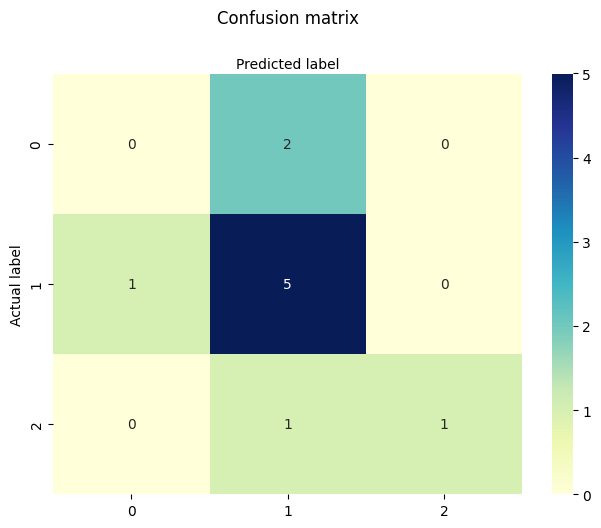

In [61]:
# plotting confusion matrix
plot_conf_mat(cm)